In [1]:
import cv2
#from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#mount Drive as external disk
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)


#absolute_path = '/content/drive/My Drive/AI/Lectures/Lecture4/' #your path on google drive. It should start with /content/drive/My Drive/ and then the name of your folder.

Mounted at /content/drive


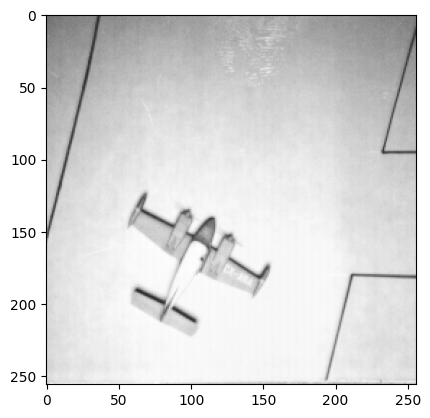

In [2]:
# read image
src = cv2.imread('images/5.1.11.tiff', 0)
plt.imshow(src, cmap='gray')

array([[  0,   0,   0, ...,   0,   0,   0],
       [104, 102, 104, ..., 119, 112, 113],
       [105, 105, 104, ..., 116, 115, 114],
       ...,
       [194, 197, 196, ..., 195, 197, 197],
       [185, 192, 192, ..., 218, 215, 214],
       [203, 188, 220, ..., 182, 179, 172]], dtype=uint8)

[[255 255 255 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 [100 100 104 ... 112 113 110]
 ...
 [194 184 196 ... 229 218 217]
 [220 212 224 ... 126 132 134]
 [148 216 119 ... 255 255 255]]
(256, 256)


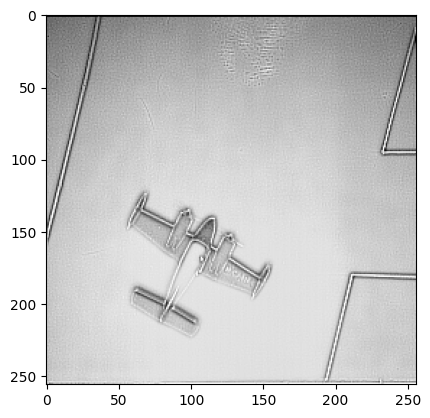

In [29]:
# prepare the filter
#kernel = [[0,0,0], [0,1,0], [0,0,0]] #identity
kernel = np.array([[-1,-1,-1],
                   [-1,6,-1],
                   [-1,-1,-1]])

# apply kernel to the original image
filterSum = np.sum(kernel)
if filterSum == 0:
  filterSum = 1

dst = cv2.filter2D(src, -1, 1./filterSum*np.array(kernel))

# concatenate images horizontally
result = np.concatenate((src, dst), axis=1)
plt.imshow(dst, cmap='gray')

print(dst)
print(dst.shape)

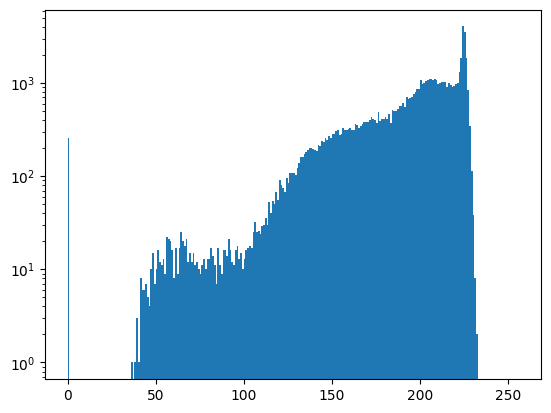

In [19]:
src2 = src.copy()

plt.hist(src2.ravel(),256,[0,256]) #flatten the array with ravel
plt.yscale('log')
plt.show()

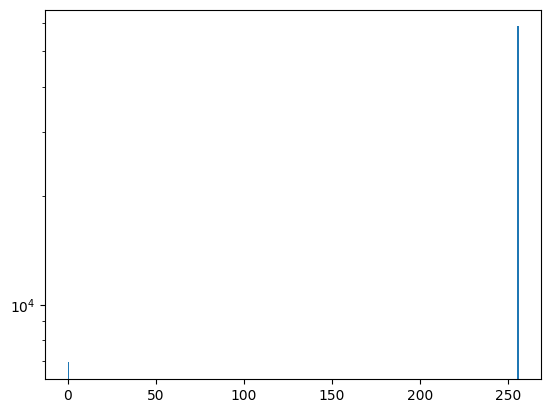

In [20]:
super_threshold_indices = src2 > 150
src2[super_threshold_indices] = 255

sub_threshold_indices = src2 < 151
src2[sub_threshold_indices] = 0


plt.hist(src2.ravel(),256,[0,256]) #flatten the array with ravel
plt.yscale('log')
plt.show()

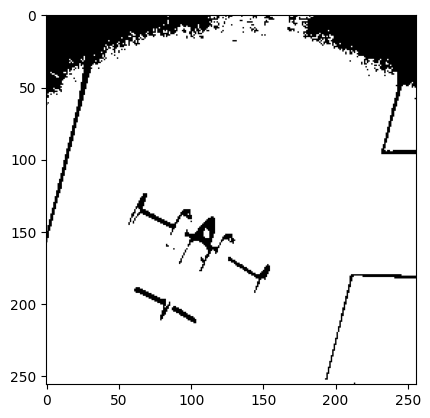

In [30]:
plt.imshow(src2, cmap='gray')

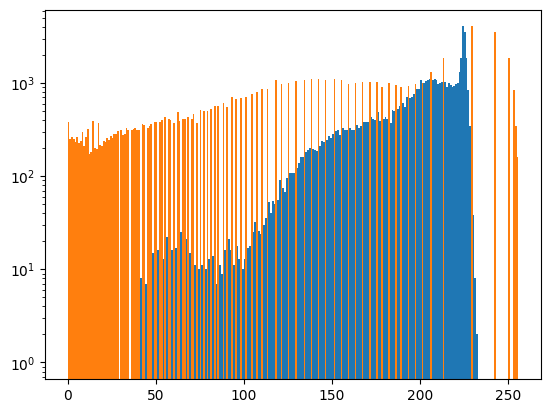

In [23]:
src3 = src.copy()

src3 = cv2.equalizeHist(src3)

plt.hist(src.ravel(),256,[0,256]) #flatten the array with ravel
plt.hist(src3.ravel(),256,[0,256]) #flatten the array with ravel
plt.yscale('log')
plt.show()

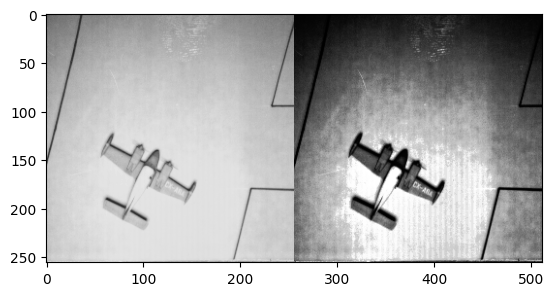

In [31]:
result = np.concatenate((src, src3), axis=1)
plt.imshow(result, cmap='gray')


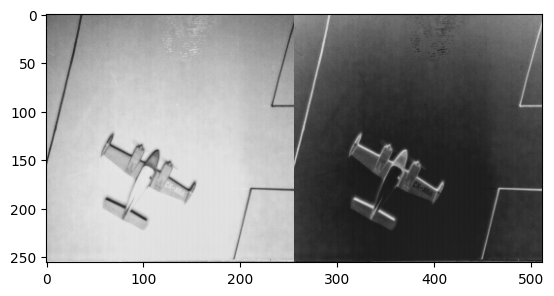

In [32]:

src4 = src.copy()
src4 = 255 - src4


result = np.concatenate((src, src4), axis=1)
plt.imshow(result, cmap='gray')


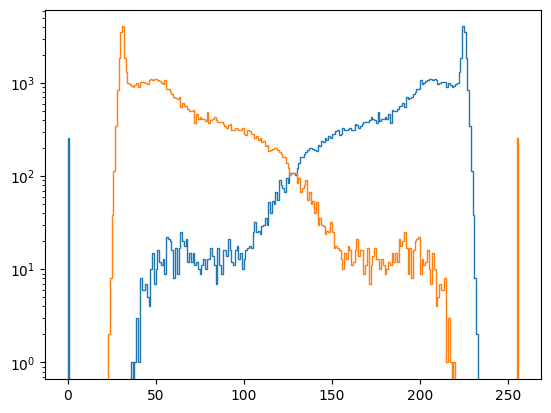

In [35]:
plt.hist(src.ravel(),256,[0,256],histtype=u'step') #flatten the array with ravel
plt.hist(src4.ravel(),256,[0,256],histtype=u'step') #flatten the array with ravel

plt.yscale('log')
plt.show()

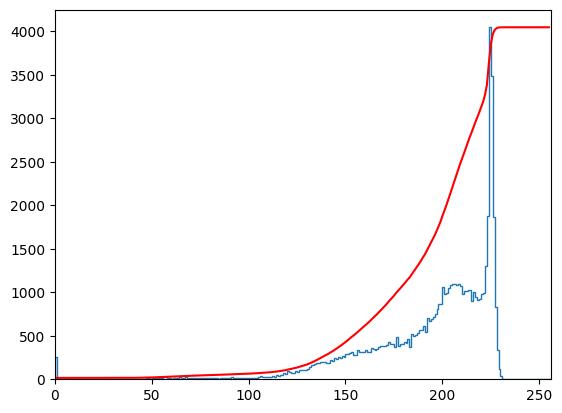

In [34]:
hist,bins = np.histogram(src.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.hist(src.ravel(),256,[0,256],histtype=u'step') #flatten the array with ravel
plt.plot(cdf_normalized, color = 'r')
plt.xlim([0,256])

plt.show()

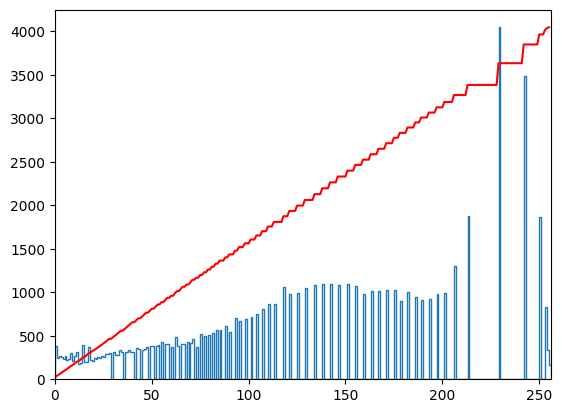

In [33]:
hist,bins = np.histogram(src3.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.hist(src3.ravel(),256,[0,256],histtype=u'step') #flatten the array with ravel
plt.plot(cdf_normalized, color = 'r')
plt.xlim([0,256])

plt.show()